# Matriz de sombras (shadow matrix)

Vamos a ver que aplicación tiene este tema.

La gráfica se podría decir que es similar a un `box plot` 

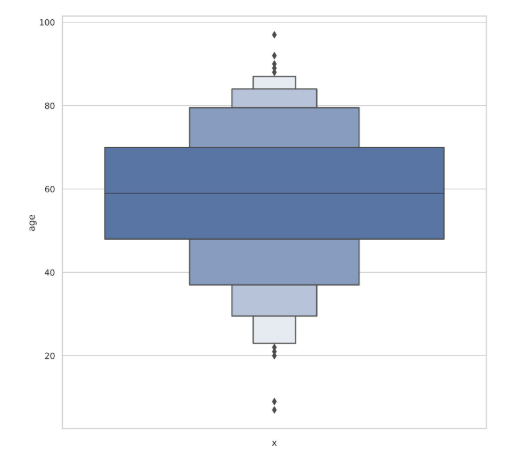

Analizamos nuestro conjunto de datos `risk-factors` y la variable `edad` es una variable que posee todos lo datos, pero tenemos otras variables en donde existen datos faltantes.

Lo que yo quiero hacer es:
> Si yo tengo todos los valores de la edad, ¿habrá valores faltantes asociados a ciertas edades? pues podemos averiguarlo haciendo gráficas como las siguientes. 

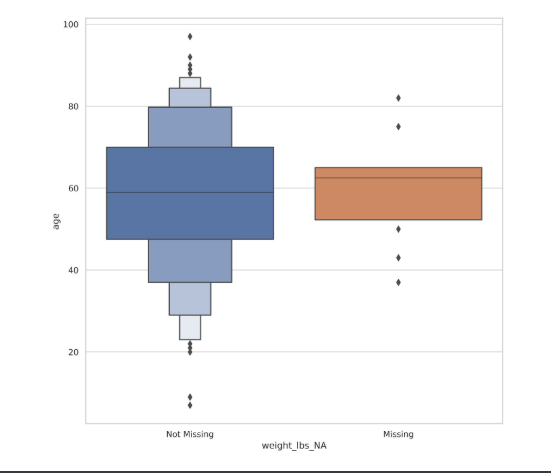

En la anterior gráfica agregamos una nueva variable `weight_lbs_NA` tiene 2 clasificaciones `Not Missing` y `Missing` (Es decir si el peso es nulo o no - Si está faltante o no). De esta manera podemos determinar si los valores faltantes están ocurriendo en cierta zona referente a otra variable o no y de esta manera obtener estadísticos que nos ayuden a entender que está pasando con estos valores faltantes y asociarlo posiblemente a algún tipo de mecanismo de valores faltantes.

En la gráfica anterior podemos observar, entonces podemos decir que de los valores faltantes nuestros datos faltantes se encuentran entre la zona de **60** y su media es superior a **60**. También vemos que existen un sesgo en la distribución y que los cuantiles están desproporcionados. Es decir tenemos una zona donde se concentra la distribución y existencia de outliers.

Entonces también de esta forma podemos hacer una relación de que el peso de los pacientes este relacionado con la edad, pero necesitamos explorar más a fondo para asegurarlo.

Pero lo más importante es ¿cómo llegamos nosotros a esta gráfica y establecer este tipo de relaciones? usaremos el concepto de `shadow matrix`

## Shadow matrix

### ¿Cómo la vamos a construir?

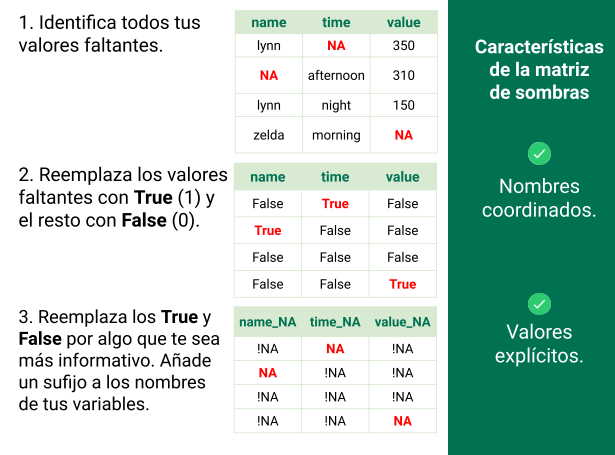

1. Identificar todos los valores faltantes, es decir vemos que hay N/A.
2. Lo siguiente es reemplazarlos.
3. Al último reemplazar por algo más informativo como NA, para que la librería pueda leer los valores faltantes. Ademas de añadir un sub-fijo NA para cada variable y así identificar los valores faltantes.
Así voy a tener mi variable con un sub-fijo elegido

#### Características de la matriz de sombras
- Nombres coordinados.
- Valores explícitos.

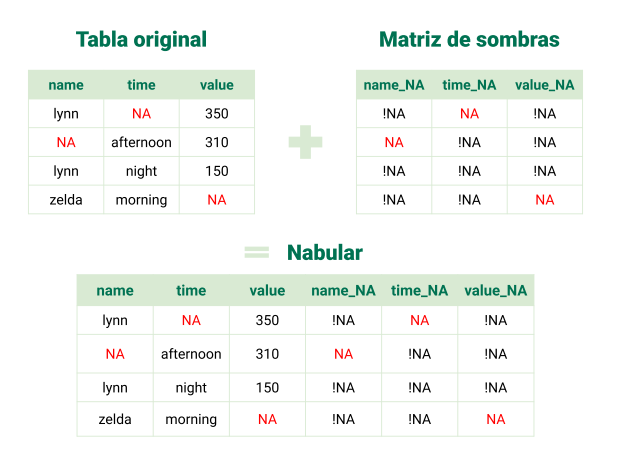

De esta manera tengo mis datos, es decir:
- Tabla original.
- Matriz de sombras
- La fusión de ambas en una gran matriz que se le conoce como **Nabular**. Que viene de la combinación de NA (Datos faltantes) y Bular (Tabular ) de las tablas originales.

Entonces tendríamos nuestra matriz y los valores faltantes lista para realizar visualizaciones importantes. Vamos a crear una con código.



## Shadow matrix
### Construcción  

### Importando librerías

In [1]:
### Importando librerías
import janitor      #Crear pipelines de limpieza de datos
import matplotlib.pyplot as plt
import missingno    #Visualizar valores faltantes 
import numpy as np
import pandas as pd
import pyreadr      #Leer archivos adr para este curso
import seaborn as sns
import session_info
import upsetplot    #Para gráfica de relaciones 
                    #de nuestros valores faltantes

### Leer conjunto de datos

In [2]:

#Cargar conjunto de datos
riskfactors = pyreadr.read_r('dataset/riskfactors.rda')

#Convertirlo a Data Frame
riskfactors_df = next(iter(riskfactors.values()))

#Borrar el diccionario
del riskfactors

In [3]:
#Verificar tipo 
#type(riskfactors_df)

#LLamar al data frame
riskfactors_df.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [5]:
(
    riskfactors_df
    .isna()
    .replace({
        False:'Not missing',
        True: 'Missing'
    })
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


Ya hemos creado una matriz de sombra con datos más informativos. Pero aun nos falta algo y se refiere a tener nombres coordinados entre las variables originales y las nuevas que estamos creando.

Para eso agregamos un sub-fijo a traves del método de Pandas `add_subfix()`, también tenemos el de prefijo `add_prefix` por si en algún momento lo requerimos. Y sería el string que deseemos.

Que nos indicaría si un valor faltante está presente o no.

In [7]:
(
    riskfactors_df
    .isna()
    .replace({
        False:'Not missing',
        True: 'Missing'
    })
    .add_suffix('_NA')
)

,state_NA,sex_NA,age_NA,weight_lbs_NA,height_inch_NA,bmi_NA,marital_NA,pregnant_NA,children_NA,education_NA,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


Entonces ya tenemos el prefijo que agregamos y podríamos estarlo usando para graficar, pero las librerías que tenemos.

Pero las librerías que nosotros tenemos nos piden que estén dentro del mismo conjunto de datos que nosotros tenemos, para hacerlo nosotros tenemos que concatenar ambos conjuntos de datos.

Es decir la matriz original y la matriz de sombras.

Para hacerlo lo haremos mediante la función `pipe()` y una función `lambda`.

In [8]:
(
    riskfactors_df
    .isna()
    .replace({
        False:'Not missing',
        True: 'Missing'
    })
    .add_suffix('_NA')
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df,shadow_matrix],
            axis = 'columns' 
            #Le decimos que queremos unir por columnas
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


Si hacemos un desplazamiento lateral podemos observar que ya tenemos nuestra variables originales y las variables que contienen la codificación de nuestros valores faltantes.

Nosotros podríamos comenzar a trabajar y sacar distintos estadísticos sobre esta matriz.

Ahora vamos a usar un método para hacer una automatización de esta función y así poder realizarlo de manera rápida.

### Función: *bind_shadow_matrix()*

Para ello vamos a necesitar usar la extensión de Pandas, la importamos con el siguiente código y después la implementaremos.

In [9]:
%run pandas-missing-extension-re2.py

In [10]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix()
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


Mi resultado por defecto es el anterior y es muy similar al que tenemos con el proceso pasado.

Otra opción es anexar solo las columnas con valores faltantes, para evitar tener un set muy grande.

### Añadir solo columnas con datos faltantes

In [12]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(
        only_missing=True      
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


Si nosotros vemos el número de columnas lo reduce a 58 y esto quiere decir que existían 10 columnas que no tenían datos faltantes.

Entonces solo se han agregado las columnas que tenían datos faltantes, de tal manera que solo añadimos las que nos aportan información sobre valores faltantes.

Finalmente una vez que tenemos todo preparado podemos obtener estadísticos para explorar si existe alguna referencia o relación de una ausencia de variable con respecto de otra.

### Encontrando parámetros estadísticos

In [14]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .groupby(['weight_lbs_NA'])
    ['age']
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
weight_lbs_NA,,,,,,,,
Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


Lo que hicimos fue agrupar por la ausencia de una variable `weight_lbs_NA`, luego sacamos la variable `age`. Y obtenemos los estadísticos con `describe()` diciendo que si le falta la variable `weight_lbs_NA` o no.

También podríamos resetear el index para verlo con otra forma de tabla.

In [15]:
(
    riskfactors_df
    .missing.bind_shadow_matrix(only_missing=True)
    .groupby(['weight_lbs_NA'])
    ['age']
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


Podemos ver los distintos parámetros de los valores faltantes.

En esta clase aprendimos sobre el concepto de la **matriz de sombras** y su potencial, una matriz que te permite establecer relaciones entre las variables que tiene todas sus observaciones y la ausencia o presencia de otras variables, de tal forma que podemos comparar estadísticos o visualizarlos de una manera efectiva.

Hacernos preguntas sobre si existe una diferencia significativa entre la presencia de una variable del grupo que tienes observaciones vs el grupo en el que no tienes observaciones. 
